In [1]:
import pandas as pd

# Loading Dataset

In [2]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    return df

In [3]:
movies_df = load_dataset('data/all_movies.csv')
movies_df.head()

,movie_name,index,utterance,count_utterances,tag
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism
2,12 Angry Men,2,Shh. Shh.,2065,racism
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism


In [4]:
annotations_word_embedding_fox_news_df = load_dataset('annotations/annotations_word_embedding_fox_news.csv')
annotations_word_embedding_fox_news_df.rename(columns={'label': 'label_fox_news'}, inplace=True)
annotations_word_embedding_fox_news_df.head()

,movie_name,index,label_fox_news
0,12 Angry Men,0,not hate speech
1,12 Angry Men,1,not hate speech
2,12 Angry Men,2,not hate speech
3,12 Angry Men,3,not hate speech
4,12 Angry Men,4,not hate speech


# Joining Datasets

In [5]:
df_results = movies_df.merge(annotations_word_embedding_fox_news_df, on=['index', 'movie_name'])

In [6]:
df_results.head()

,movie_name,index,utterance,count_utterances,tag,label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,not hate speech


## Analyse Results

In [25]:
def plot_label_by_tag_distribution(df, title):
    df = df_results.groupby('tag').label_fox_news.value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns="label_fox_news"
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [29]:
def plot_label_by_tag_distribution_percentage(df, title):
    ax = df_results.groupby('tag').label_fox_news.value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

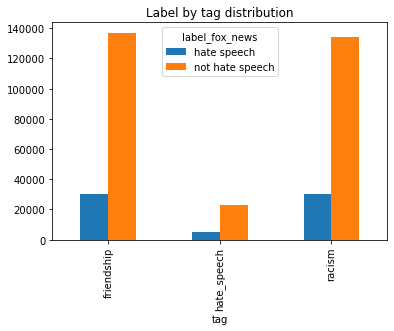

In [30]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution')

<AxesSubplot:title={'center':'Label by tag distribution (Percentage)'}, xlabel='tag'>

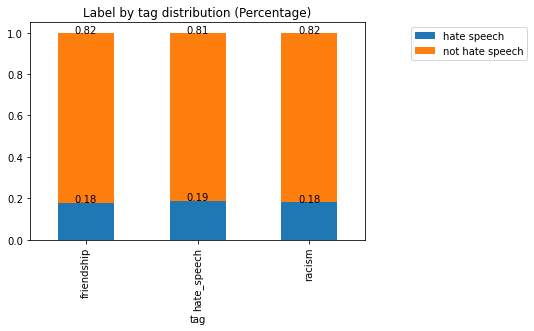

In [31]:
plot_label_by_tag_distribution_percentage(df_results, title='Label by tag distribution (Percentage)')

## hate speech examples

In [20]:
hatespeech_sentences = df_results[df_results.label_fox_news=='hate speech'].utterance.values

In [33]:
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)

murder in the first degree.
A premeditated murder is the most serious charge tried in our criminal courts.
One man is dead.
a reasonable doubt...
then you must bring me a verdict of not guilty.
Now if, however, there's no reasonable doubt...
Oh, I thought we might want to vote by ballot.
Yeah? I almost fell asleep.
even when it's an openandshut case like this one.
 Mr. Foreman.
 Gee, I don't know.
No real... dead spots.
I tell you, we were lucky to get a murder case.
Isn't that funny?
If you had to sort out all that junk...
Like that thing with the movies.
You know what we're dealing with.
Where do we sit here?
 I think it's reasonable to sit in order.
 Yeah. That's 12. We go around...
I beg pardon?
I thought he was really sharp, the way he handled all those points one by one.
A lot of drive too, you know?
Say, we'd like to get started.
 We'd like to get started.
They let those kids run wild up there.
Well, maybe it serves 'em right.
The old man is inside.
No. Baltimore.
That's like be

# Word embedding

## Twitter